# Prompt Mühendisliğine Başlarken
Bu not defteri, prompt mühendisliği hakkında öğrenme amacıyla hazırlanmış örnekler ve alıştırmalar içermektedir.

Tüm örneklerde [OpenAI APIs](https://platform.openai.com/)'leri kullanılacaktır. Varsayılan ayarlar olarak `temperature=0.7` ve `top-p=1` değerlerini kullanıyorum.

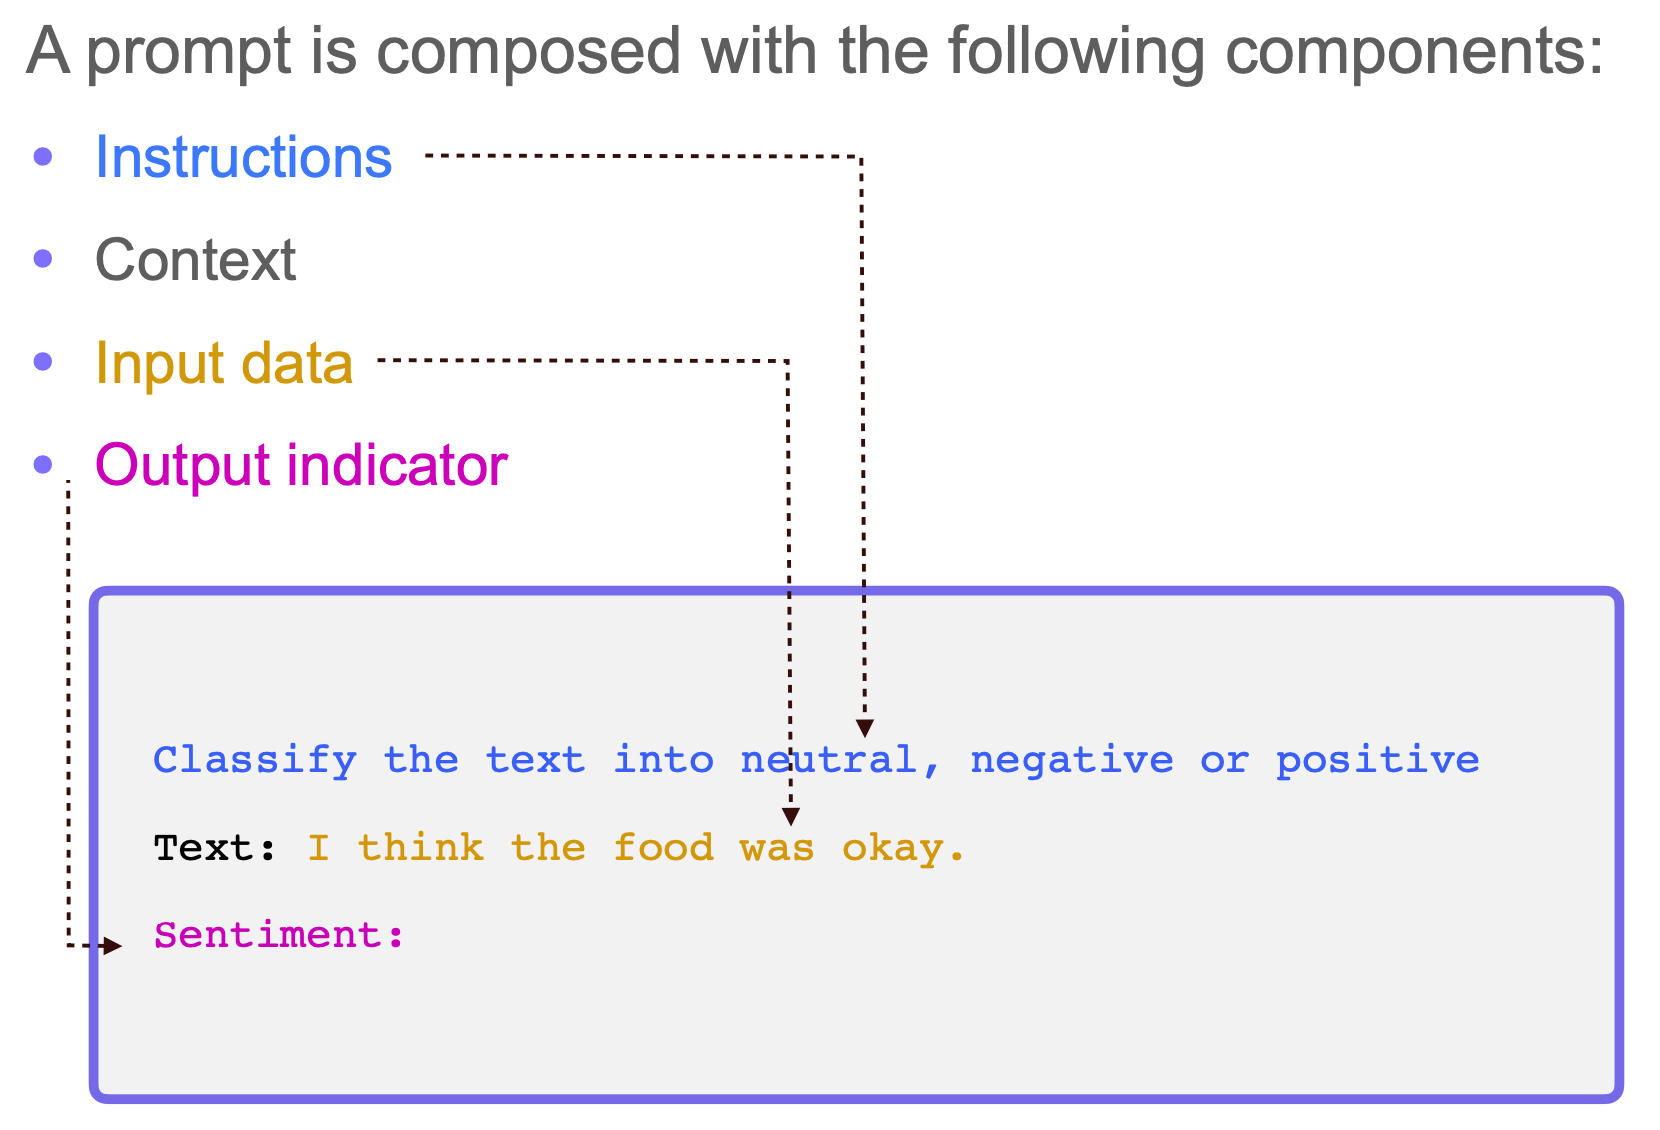

#### Temel Prompt Türleri

1. **Açık Uçlu (Open-ended) Prompts**
Modelin özgürce yaratıcı cevaplar üretmesi beklenir.

**Kullanım Senaryoları:** Hikaye anlatımı, içerik üretimi, fikir geliştirme

**Ör:**
“Mars’ta bir şehir nasıl tasarlanabilir?”

---

2. **Talimat Tabanlı (Instructional) Prompts**
Tanım: Modelden belirli bir görevi gerçekleştirmesi istenir.

**Kullanım Senaryoları:** Kodlama, veri dönüştürme, açıklama üretme

**Ör:**
“Aşağıdaki Python kodunu yorumla ve işlevini açıkla.”

---

3. **Soru-Cevap (Question-Answering) Prompts**
Spesifik bir soruya doğrudan cevap üretmesi beklenir.

**Kullanım Senaryoları:** Arama, bilgi çekme, belge analizi

**Ör:**
“2024 Avrupa Futbol Şampiyonası nerede düzenleniyor?”

---

4. **Tamamlama (Completion) Prompts**
Verilen girdinin devamını üretmesi beklenir.

**Kullanım Senaryoları:** Otomatik tamamlama, yazım önerileri, devam senaryoları

**Ör:**
“Yapay zekanın gelecekteki etkileri şunlardır:”

---

5. **Diyalog (Chat / Multi-turn) Prompts**
Rol ve bağlam içeren çok adımlı sohbet etkileşimi

**Kullanım Senaryoları:** Sohbet robotları, müşteri hizmetleri, etkileşimli asistanlar

**Ör:**
```json 
Copy
Edit
[
  {"role": "user", "content": "Bir pizza sipariş etmek istiyorum."},
  {"role": "assistant", "content": "Ne tür bir pizza tercih edersiniz?"}
]
```

---

## 1. Prompt Mühendisliğinin Temelleri

Hedefler:

- Kütüphaneleri yüklemek
- Formatı gözden geçirmek
- Temel prompt'ları ele almak
- Yaygın kullanım senaryolarını incelemek

Aşağıda gerekli kütüphaneler, yardımcı fonksiyonlar ve yapılandırmalar yüklenmektedir.

In [19]:
%%capture
# gerekli kütüphaneleri yükle ya da güncelle
!pip install --upgrade openai
!pip install --upgrade langchain
!pip install --upgrade python-dotenv

In [20]:
import openai
import os
import IPython
from langchain.llms import OpenAI
from dotenv import load_dotenv

Ortam değişkenlerini yükleyin. Dilediğiniz yöntemi kullanabilirsiniz, ancak ben python-dotenv kullandım.

Yapmanız gereken tek şey, OPENAI_API_KEY içeren bir .env dosyası oluşturmak ve ardından bu dosyayı yüklemektir.

In [22]:
load_dotenv()

# API konfigürasyonları
openai.api_key = os.getenv("OPENAI_API_KEY")

# LangChain için
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

In [23]:
def set_open_params(
    model="gpt-3.5-turbo",
    temperature=0.7,
    max_tokens=256,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0,
):
    """ set openai parameters"""

    openai_params = {}    

    openai_params['model'] = model
    openai_params['temperature'] = temperature
    openai_params['max_tokens'] = max_tokens
    openai_params['top_p'] = top_p
    openai_params['frequency_penalty'] = frequency_penalty
    openai_params['presence_penalty'] = presence_penalty
    return openai_params

def get_completion(params, messages):
    """ GET completion from openai api"""

    response = openai.chat.completions.create(
        model = params['model'],
        messages = messages,
        temperature = params['temperature'],
        max_tokens = params['max_tokens'],
        top_p = params['top_p'],
        frequency_penalty = params['frequency_penalty'],
        presence_penalty = params['presence_penalty'],
    )
    return response

Basit bir prompt örneği:

In [24]:
# basit örnek
params = set_open_params()

prompt = "The sky is"

messages = [
    {
        "role": "user",
        "content": prompt
    }
]

response = get_completion(params, messages)

In [25]:
response.choices[0].message.content

'blue and filled with fluffy white clouds.'

Farklı temperature değerleriyle deneyerek sonuçları karşılaştırın:

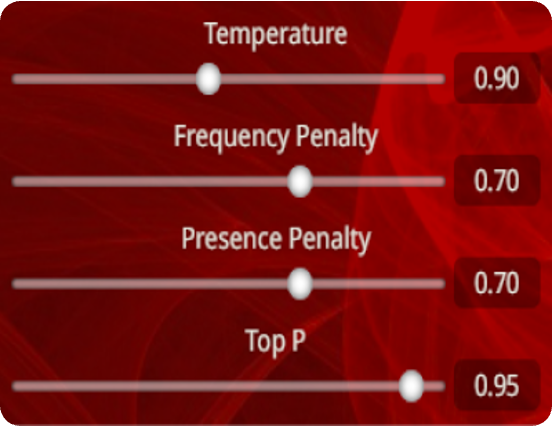

- **Temperature:** Yanıtların yaratıcılığını kontrol eder. Düşük değerler daha tutarlı, yüksek değerler ise daha yaratıcı çıktılar sağlar.

- **Top-P (Nucleus Sampling):** Çeşitlilikle ilgilidir. En olası kelimelerin belirli bir yüzdesi arasından seçim yaparak daha doğal yanıtlar elde edilir. Top-p’yi azaltırsanız , model kesin ve gerçek cevaplar verir. 

- **Top-K Sampling:** K en yüksek olasılıklı kelime arasından seçim yaparak daha kontrollü yanıtlar sağlar.

- **Max Length:** Cevap cümlesinin uzunluğu ile ilgilidir. Böylece uzun ve alakasız yanıtları kontrol ederek maliyeti ayarlayabilirsiniz.

- **Frequency Penalty:** Kelime sıklığı ile ilgilidir, yani model tarafından çok sayıda üretilen bir kelimeniz varsa, bunu artırabilirsiniz çünkü daha yüksek Ferqency Penalty tekrarlanan kelimeleri engeller.

- **Presence Penalty:** Tekrarlanan tokenlara ceza uygulayan bir mekanizmadır, ancak sıklık cezasının aksine, tüm tekrarlanan tokenları eşit şekilde ele alır. Bir belirteç iki kez veya on kez görünse de ceza aynıdır.


In [26]:
params = set_open_params(temperature=0)
response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

 blue and clear, with fluffy white clouds scattered across the horizon. The sun is shining brightly, casting a warm glow over everything below. It's a beautiful day to be outside and enjoy the beauty of nature.

### 1.1 Metin Özeti (Text Summarization)

In [27]:
params = set_open_params(temperature=0.7)
prompt = """Antibiotics are a type of medication used to treat bacterial infections. They work by either killing the bacteria or preventing them from reproducing, allowing the body's immune system to fight off the infection. Antibiotics are usually taken orally in the form of pills, capsules, or liquid solutions, or sometimes administered intravenously. They are not effective against viral infections, and using them inappropriately can lead to antibiotic resistance. 

Explain the above in one sentence:"""

messages = [
    {
        "role": "user",
        "content": prompt
    }
]

response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

Antibiotics are medications used to treat bacterial infections by killing or preventing the growth of bacteria, but they are ineffective against viral infections and misuse can lead to antibiotic resistance.

Alıştırma: Modele, paragrafı "Ben 5 yaşındayım" gibi bir cümleyle açıklamasını söyleyin.

Herhangi bir fark gözlemliyor musunuz?

### 1.2 Soru-Cevap (QA - Question Ansewring)

In [11]:
prompt = """Answer the question based on the context below. Keep the answer short and concise. Respond "Unsure about answer" if not sure about the answer.

Context: Teplizumab traces its roots to a New Jersey drug company called Ortho Pharmaceutical. There, scientists generated an early version of the antibody, dubbed OKT3. Originally sourced from mice, the molecule was able to bind to the surface of T cells and limit their cell-killing potential. In 1986, it was approved to help prevent organ rejection after kidney transplants, making it the first therapeutic antibody allowed for human use.

Question: What was OKT3 originally sourced from?

Answer:"""

messages = [
    {
        "role": "user",
        "content": prompt
    }
]

response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)


Mice

Alıştırma: Prompt'u düzenleyin ve modeli cevaptan emin olmadığını belirtecek şekilde yanıt vermeye yönlendirin.

### 1.3 Metin Sınıflandırma (Text Classification)

In [28]:
prompt = """Classify the text into neutral, negative or positive.

Text: I think the food was okay.

Sentiment:"""

messages = [
    {
        "role": "user",
        "content": prompt
    }
]

response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

Neutral

Alıştırma: Prompt’u, modelin seçtiği cevaba bir açıklama eklemesini isteyecek şekilde düzenleyin.

### 1.4 Rol Yapma (Role Playing)

In [13]:
prompt = """The following is a conversation with an AI research assistant. The assistant tone is technical and scientific.

Human: Hello, who are you?
AI: Greeting! I am an AI research assistant. How can I help you today?
Human: Can you tell me about the creation of blackholes?
AI:"""

messages = [
    {
        "role": "user",
        "content": prompt
    }
]

messages = [
    {
        "role": "user",
        "content": prompt
    }

]

response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

Certainly! Black holes are created when massive stars reach the end of their life cycle and undergo a supernova explosion. The core of the star collapses under its own gravity, forming an extremely dense region known as a singularity. This singularity has such strong gravitational pull that not even light can escape from it, creating what we call a black hole.

Alıştırma: Prompt’u, modelin yanıtlarını **kısa ve öz** tutmasını isteyecek şekilde düzenleyin.

### 1.5 Kod Üretimi (Code Generation)

In [14]:
prompt = "\"\"\"\nTable departments, columns = [DepartmentId, DepartmentName]\nTable students, columns = [DepartmentId, StudentId, StudentName]\nCreate a MySQL query for all students in the Computer Science Department\n\"\"\""

messages = [
    {
        "role": "user",
        "content": prompt
    }
]

response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)


SELECT s.StudentId, s.StudentName
FROM students s
JOIN departments d ON s.DepartmentId = d.DepartmentId
WHERE d.DepartmentName = 'Computer Science'

### 1.6 Akıl Yürütme (Reasoning)

In [15]:
prompt = """The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. 

Solve by breaking the problem into steps. First, identify the odd numbers, add them, and indicate whether the result is odd or even."""

messages = [
    {
        "role": "user",
        "content": prompt
    }
]

response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

Odd numbers in the group: 15, 5, 13, 7, 1

Adding them up: 15 + 5 + 13 + 7 + 1 = 41

The sum of the odd numbers (41) is an odd number.

Alıştırma: Prompt’un **yapısını ve çıktı formatını** iyileştirecek şekilde geliştirin.

## 2. İleri Düzey Promptlama Teknikleri (Advanced Prompting Techniques)

Daha gelişmiş promptlama tekniklerini ele almak: few-shot, chain-of-thought (düşünce zinciri) ve diğerleri...

### 2.2 Few-shot prompts

In [16]:
prompt = """The odd numbers in this group add up to an even number: 4, 8, 9, 15, 12, 2, 1.
A: The answer is False.

The odd numbers in this group add up to an even number: 17,  10, 19, 4, 8, 12, 24.
A: The answer is True.

The odd numbers in this group add up to an even number: 16,  11, 14, 4, 8, 13, 24.
A: The answer is True.

The odd numbers in this group add up to an even number: 17,  9, 10, 12, 13, 4, 2.
A: The answer is False.

The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. 
A:"""

messages = [
    {
        "role": "user",
        "content": prompt
    }
]

response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

The answer is False.

### 2.3 Chain-of-Thought (CoT) Prompting

In [17]:
prompt = """The odd numbers in this group add up to an even number: 4, 8, 9, 15, 12, 2, 1.
A: Adding all the odd numbers (9, 15, 1) gives 25. The answer is False.

The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. 
A:"""

messages = [
    {
        "role": "user",
        "content": prompt
    }
]

response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)

Adding all the odd numbers (15, 5, 13, 7, 1) gives 41. The answer is False.

### 2.4 Zero-shot CoT

In [32]:
prompt = """I went to the market and bought 10 apples. I gave 2 apples to the neighbor and 2 to the repairman. I then went and bought 5 more apples and ate 1. How many apples did I remain with?

Let's think step by step."""

messages = [
    {
        "role": "user",
        "content": prompt
    }
]

response = get_completion(params, messages)
IPython.display.Markdown(response.choices[0].message.content)


You started with 10 apples.
You gave 2 apples to the neighbor, so you have 10 - 2 = 8 apples.
You gave 2 more apples to the repairman, so you have 8 - 2 = 6 apples.
You bought 5 more apples, so you have 6 + 5 = 11 apples.
You ate 1 apple, so you have 11 - 1 = 10 apples remaining.

So, you remained with 10 apples in the end.

### 2.5 Self-Consistency
Prompt mühendisliğinde daha gelişmiş tekniklerden biri olarak kabul edilen self-consistency, Wang ve arkadaşları tarafından 2022 yılında önerilmiştir. Bu teknik, "chain-of-thought (CoT) prompting" yönteminde kullanılan basit greedy (açgözlü) çözümlemenin yerine geçmeyi hedefler.

Self-consistency yaklaşımının temel fikri, few-shot CoT yöntemiyle birden fazla ve çeşitli akıl yürütme yolunu örneklemek ve ardından bu yanıtlar arasından en tutarlı (consistent) olanı seçmektir. Bu yaklaşım, özellikle aritmetik ve gündelik akıl yürütme (commonsense reasoning) gerektiren görevlerde CoT prompting'in performansını artırmada etkilidir.

Şimdi bu tekniği aritmetik akıl yürütme içeren aşağıdaki örnekle deneyelim:

*Prompt:*
```
When I was 6 my sister was half my age. Now
I’m 70 how old is my sister?
```

*Çıktı:*
```
35
```

Çıktı yanlış! Peki bunu self-consistency yöntemiyle nasıl iyileştirebiliriz? Haydi deneyelim.
Wang ve arkadaşlarının 2022 tarihli çalışmasında yer alan few-shot örneklerini (Tablo 17) kullanacağız:

*Prompt:*
```
Q: There are 15 trees in the grove. Grove workers will plant trees in the grove today. After they are done,
there will be 21 trees. How many trees did the grove workers plant today?
A: We start with 15 trees. Later we have 21 trees. The difference must be the number of trees they planted.
So, they must have planted 21 - 15 = 6 trees. The answer is 6.

Q: If there are 3 cars in the parking lot and 2 more cars arrive, how many cars are in the parking lot?
A: There are 3 cars in the parking lot already. 2 more arrive. Now there are 3 + 2 = 5 cars. The answer is 5.

Q: Leah had 32 chocolates and her sister had 42. If they ate 35, how many pieces do they have left in total?
A: Leah had 32 chocolates and Leah’s sister had 42. That means there were originally 32 + 42 = 74
chocolates. 35 have been eaten. So in total they still have 74 - 35 = 39 chocolates. The answer is 39.

Q: Jason had 20 lollipops. He gave Denny some lollipops. Now Jason has 12 lollipops. How many lollipops
did Jason give to Denny?
A: Jason had 20 lollipops. Since he only has 12 now, he must have given the rest to Denny. The number of
lollipops he has given to Denny must have been 20 - 12 = 8 lollipops. The answer is 8.

Q: Shawn has five toys. For Christmas, he got two toys each from his mom and dad. How many toys does
he have now?
A: He has 5 toys. He got 2 from mom, so after that he has 5 + 2 = 7 toys. Then he got 2 more from dad, so
in total he has 7 + 2 = 9 toys. The answer is 9.

Q: There were nine computers in the server room. Five more computers were installed each day, from
monday to thursday. How many computers are now in the server room?
A: There are 4 days from monday to thursday. 5 computers were added each day. That means in total 4 * 5 =
20 computers were added. There were 9 computers in the beginning, so now there are 9 + 20 = 29 computers.
The answer is 29.

Q: Michael had 58 golf balls. On tuesday, he lost 23 golf balls. On wednesday, he lost 2 more. How many
golf balls did he have at the end of wednesday?
A: Michael initially had 58 balls. He lost 23 on Tuesday, so after that he has 58 - 23 = 35 balls. On
Wednesday he lost 2 more so now he has 35 - 2 = 33 balls. The answer is 33.

Q: Olivia has $23. She bought five bagels for $3 each. How much money does she have left?
A: She bought 5 bagels for $3 each. This means she spent 5

Q: When I was 6 my sister was half my age. Now I’m 70 how old is my sister?
A:
```

*Çıktı 1:*
```
When I was 6 my sister was half my age, so she was 3. Now I am 70, so she is 70 - 3 = 67. The answer is 67.
```

*Çıktı 2:*
```
When the narrator was 6, his sister was half his age, which is 3. Now that the narrator is 70, his sister would be 70 - 3 = 67 years old. The answer is 67.
```

*Çıktı 3:*
```
When I was 6 my sister was half my age, so she was 3. Now I am 70, so she is 70/2 = 35. The answer is 35.
```

Nihai cevabın hesaplanması birkaç adım içerir (ayrıntılar için makaleye göz atabilirsiniz), ancak basitlik açısından bakıldığında, çoğunluğun üzerinde uzlaştığı bir yanıtın ortaya çıktığını görebiliriz — bu da esasen nihai yanıt olarak kabul edilir.


### 2.6 Generate Knowledge Prompting (RAG)

Ayrı bir notebook'da ele alındı

---